<a href="https://colab.research.google.com/github/VitorSancho/ImersaoDadosAlura/blob/main/Desafio_Imers%C3%A3o_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.svm import LinearSVR

fonte='https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

dados=pd.read_csv(fonte)
provas=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
escolaridade_pai=['Q001']
escolaridade_mae=['Q002']
renda_familiar=['Q006']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(-1.0, 4500.0)

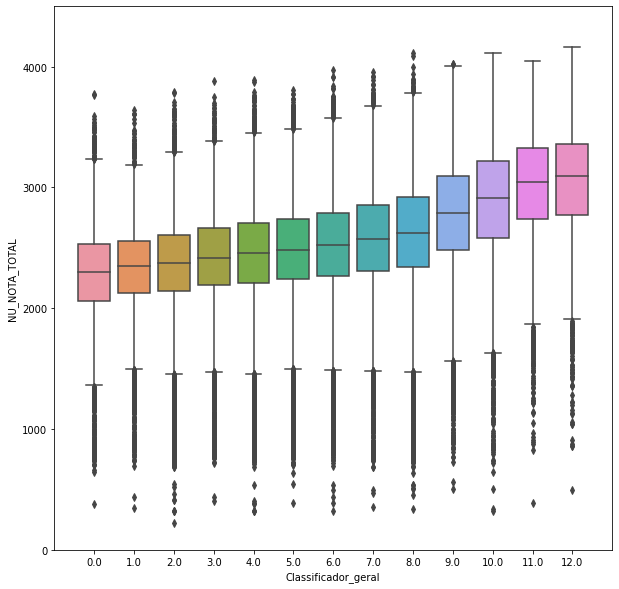

In [ ]:
# Relação escolaridade dos pais x Desempenho

tabela_notas=dados[provas]
tabela_renda=dados[renda_familiar]

tabela_notas["NU_NOTA_TOTAL"]=tabela_notas[provas].sum(axis=1)
Nota_total=tabela_notas['NU_NOTA_TOTAL']

tabela_escolaridade_pais=pd.DataFrame(dados[['Q001','Q002']])

tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q001'] == 'A', 'Classificador_pai'] = 0 
tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q001'] == 'B', 'Classificador_pai'] = 1 
tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q001'] == 'C', 'Classificador_pai'] = 2 
tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q001'] == 'D', 'Classificador_pai'] = 3 
tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q001'] == 'E', 'Classificador_pai'] = 4 
tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q001'] == 'F', 'Classificador_pai'] = 5 
tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q001'] == 'G', 'Classificador_pai'] = 6
tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q001'] == 'H', 'Classificador_pai'] = 0

 



tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q002'] == 'A', 'Classificador_mae'] = 0 
tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q002'] == 'B', 'Classificador_mae'] = 1 
tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q002'] == 'C', 'Classificador_mae'] = 2 
tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q002'] == 'D', 'Classificador_mae'] = 3 
tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q002'] == 'E', 'Classificador_mae'] = 4 
tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q002'] == 'F', 'Classificador_mae'] = 5 
tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q002'] == 'G', 'Classificador_mae'] = 6
tabela_escolaridade_pais.loc[tabela_escolaridade_pais['Q002'] == 'H', 'Classificador_mae'] = 0 

tabela_escolaridade_pais['Classificador_geral']=tabela_escolaridade_pais['Classificador_mae']+tabela_escolaridade_pais['Classificador_pai']

Classificador_geral=tabela_escolaridade_pais['Classificador_geral']

Relacao_escolaridade_dos_paix_vs_nota_total=pd.concat([Nota_total,Classificador_geral,tabela_renda],axis=1)

Relacao_escolaridade_dos_paix_vs_nota_total=Relacao_escolaridade_dos_paix_vs_nota_total.query('NU_NOTA_TOTAL!=0')

plt.figure(figsize=(10,10))
sns.boxplot(data=Relacao_escolaridade_dos_paix_vs_nota_total,y='NU_NOTA_TOTAL',x='Classificador_geral')
plt.xlim((-1,13))
plt.ylim((-1,4500))


(-1.0, 12.5)

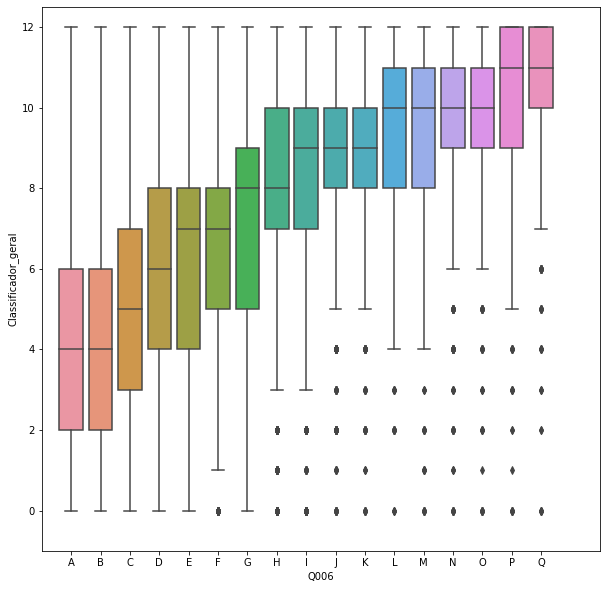

In [ ]:
# Boxplot renda familiar VS escolaridade pais
renda_ordenada=dados["Q006"].unique()
renda_ordenada.sort()

plt.figure(figsize=(10,10))
sns.boxplot(data=Relacao_escolaridade_dos_paix_vs_nota_total,y='Classificador_geral',x='Q006',order=renda_ordenada)
plt.xlim((-1,18))
plt.ylim((-1,12.5))

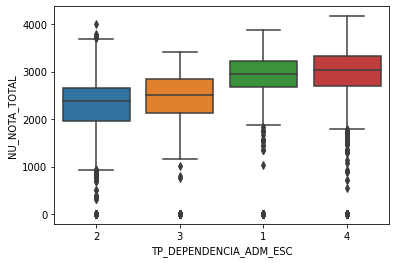

In [ ]:
# Desempenho por dependencia administrativa
dados["NU_NOTA_TOTAL"]=tabela_notas[provas].sum(axis=1)
'''
escola_federal=dados.query('TP_DEPENDENCIA_ADM_ESC==1')['NU_NOTA_TOTAL']
escola_municipal=dados.query('TP_DEPENDENCIA_ADM_ESC==3')['NU_NOTA_TOTAL']
escola_estadual=dados.query('TP_DEPENDENCIA_ADM_ESC==2')['NU_NOTA_TOTAL']
escola_privada=dados.query('TP_DEPENDENCIA_ADM_ESC==4')['NU_NOTA_TOTAL']
'''
sns.boxplot(x="TP_DEPENDENCIA_ADM_ESC",y="NU_NOTA_TOTAL",data=dados,order=[2,3,1,4])


(0.0, 5000.0)

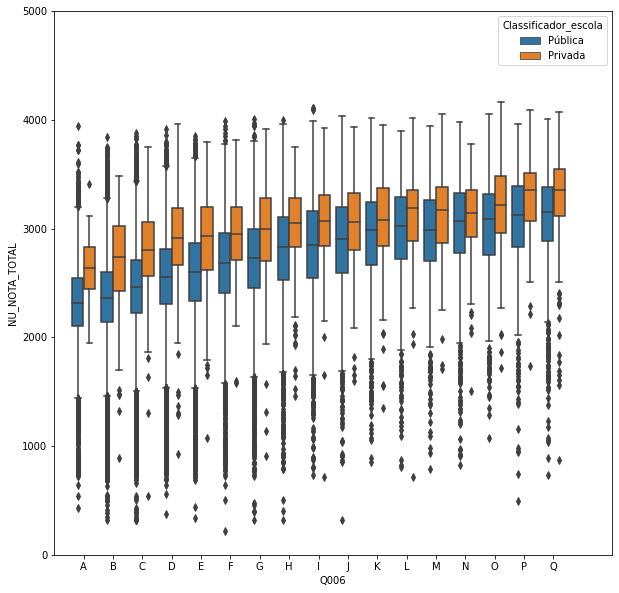

In [ ]:
#Diferença de desempenho entre escola pública e privada por classe social

dados.loc[dados['TP_DEPENDENCIA_ADM_ESC'] != 4, 'Classificador_escola'] = 'Pública' 
dados.loc[dados['TP_DEPENDENCIA_ADM_ESC'] == 4, 'Classificador_escola'] = 'Privada'

Series_escola=dados['Classificador_escola']
Estado=dados['SG_UF_RESIDENCIA']


Escola_desempenho=pd.concat([Relacao_escolaridade_dos_paix_vs_nota_total,Series_escola,Estado],axis=1)


plt.figure(figsize=(10,10))
sns.boxplot(x="Q006",y="NU_NOTA_TOTAL",hue='Classificador_escola',data=Escola_desempenho,order=renda_ordenada)
plt.xlim((-1,18))
plt.ylim((0,5000))

#Escola_desempenho

In [ ]:
# Quantidade de alunos da rede federal por classe social

escola_federal=dados.query('TP_DEPENDENCIA_ADM_ESC==1')
df=pd.DataFrame(escola_federal['Q006'].value_counts().sort_values(ascending=False))
df.rename(columns={'Q006': 'Contagem'}, inplace = True)
df.columns.name="Classe Social"
df.head(5)


Classe Social,Contagem
C,254
B,243
E,152
G,114
D,108
